In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import sys
from typing import List, Union, Dict, Any
import json

models = ['Llama-3.3-70B','Qwen3-Coder-480B','Arctic-Text2SQL-R1-7B']
datasets= ['bird','spider']
output_path = '/home/sina/Projects/Thesis/Text2Sql/Data/output'

sys.path.append('../../src')
from dataloader import DatasetLoader, DatasetInstance

# loader = DatasetLoader(output_path)

# Models Performance Analysis

In [3]:
def instance_to_dataframe(instances: Union[DatasetInstance, List[DatasetInstance]], 
                         flatten_nested: bool = True, 
                         include_schemas: bool = False,
                         include_analysis: bool = True) -> pd.DataFrame:
    
    rows = pd.DataFrame()
    for instance in instances:
        ins_df = instance.to_dataframe(flatten_nested=flatten_nested, 
                              include_schemas=include_schemas, 
                              include_analysis=include_analysis)
        
        rows = pd.concat([rows, ins_df], ignore_index=True)
    return rows

In [4]:
def load_and_compare_models(models, datasets, output_path):
    """
    Load all model results and create focused comparison
    """    
    loader = DatasetLoader(output_path)
    all_results = []
    
    # Load data for each model-dataset combination
    for model in models:
        for dataset in datasets:
            pattern = f"{model}*/{dataset}/instance_*.json"
            
            try:
                instances_with_path = loader.load_instances(pattern)
                instances = [inst for inst, _ in instances_with_path]
                
                if instances:
                    df = instance_to_dataframe(instances, 
                                             include_schemas=True,
                                             flatten_nested=True, 
                                             include_analysis=True)
                    df['model'] = model
                    df['dataset'] = dataset
                    all_results.append(df)
                    print(f"✓ Loaded {len(df)} instances for {model} on {dataset}")
            except Exception as e:
                print(f"✗ Error loading {model} on {dataset}: {e}")
    
    # Combine all results
    if all_results:
        combined_df = pd.concat(all_results, ignore_index=True)
        return combined_df
    else:
        return pd.DataFrame()
    
models_df = load_and_compare_models(models, datasets, output_path)

2025-09-30 01:15:15,771 - dataloader - INFO - Loading instances from /home/sina/Projects/Thesis/Text2Sql/Data/output with pattern Llama-3.3-70B*/bird/instance_*.json
2025-09-30 01:15:15,780 - dataloader - INFO - Found 250 instance files
2025-09-30 01:15:15,915 - dataloader - INFO - Successfully loaded 250 instances
2025-09-30 01:15:16,140 - dataloader - INFO - Loading instances from /home/sina/Projects/Thesis/Text2Sql/Data/output with pattern Llama-3.3-70B*/spider/instance_*.json
2025-09-30 01:15:16,144 - dataloader - INFO - Found 247 instance files
2025-09-30 01:15:16,237 - dataloader - INFO - Successfully loaded 247 instances


✓ Loaded 250 instances for Llama-3.3-70B on bird


2025-09-30 01:15:16,465 - dataloader - INFO - Loading instances from /home/sina/Projects/Thesis/Text2Sql/Data/output with pattern Qwen3-Coder-480B*/bird/instance_*.json
2025-09-30 01:15:16,472 - dataloader - INFO - Found 250 instance files
2025-09-30 01:15:16,602 - dataloader - INFO - Successfully loaded 250 instances


✓ Loaded 247 instances for Llama-3.3-70B on spider


2025-09-30 01:15:16,822 - dataloader - INFO - Loading instances from /home/sina/Projects/Thesis/Text2Sql/Data/output with pattern Qwen3-Coder-480B*/spider/instance_*.json
2025-09-30 01:15:16,832 - dataloader - INFO - Found 249 instance files
2025-09-30 01:15:16,936 - dataloader - INFO - Successfully loaded 249 instances


✓ Loaded 250 instances for Qwen3-Coder-480B on bird


2025-09-30 01:15:17,153 - dataloader - INFO - Loading instances from /home/sina/Projects/Thesis/Text2Sql/Data/output with pattern Arctic-Text2SQL-R1-7B*/bird/instance_*.json
2025-09-30 01:15:17,159 - dataloader - INFO - Found 250 instance files
2025-09-30 01:15:17,269 - dataloader - INFO - Successfully loaded 250 instances


✓ Loaded 249 instances for Qwen3-Coder-480B on spider


2025-09-30 01:15:17,502 - dataloader - INFO - Loading instances from /home/sina/Projects/Thesis/Text2Sql/Data/output with pattern Arctic-Text2SQL-R1-7B*/spider/instance_*.json
2025-09-30 01:15:17,506 - dataloader - INFO - Found 250 instance files
2025-09-30 01:15:17,615 - dataloader - INFO - Successfully loaded 250 instances


✓ Loaded 250 instances for Arctic-Text2SQL-R1-7B on bird
✓ Loaded 250 instances for Arctic-Text2SQL-R1-7B on spider


In [5]:
print(f"Total instances loaded: {len(models_df)}")

models_df.head(3)

Total instances loaded: 1496


,id,question,sql,difficulty,dataset,original_instance_id,evidence,database_name,database_type,database_path,...,model_name,model_type,model_timestamp,generated_sql,execution_correct,exact_match,semantic_equivalent,execution_error,semantic_explanation,model
0,1087,"Among the players whose height is over 180, ho...",SELECT COUNT(DISTINCT t1.id) FROM Player AS t1...,simple,bird,None,height > 180; volley score refers to volleys; ...,european_football_2,sqlite,"[""databases/european_football_2/european_footb...",...,meta-llama/Llama-3.3-70B-Instruct-Turbo-Free,together_ai,2025-09-29T06:02:08.138553,SELECT COUNT(DISTINCT T1.player_api_id) FROM P...,True,False,True,,Execution correct but not exact match,Llama-3.3-70B
1,1503,Please list the product description of the pro...,"SELECT DISTINCT T1.ProductID, T3.Description F...",simple,bird,None,,debit_card_specializing,sqlite,"[""databases/debit_card_specializing/debit_card...",...,meta-llama/Llama-3.3-70B-Instruct-Turbo-Free,together_ai,2025-09-28T13:13:16.407279,SELECT T2.Description FROM transactions_1k AS ...,False,False,True,,The two queries are semantically equivalent. A...,Llama-3.3-70B
2,691,Identify the number of adult users who have ca...,SELECT COUNT(Id) FROM users WHERE Age BETWEEN ...,simple,bird,None,adult users refer to Age BETWEEN 19 and 65; ov...,codebase_community,sqlite,"[""databases/codebase_community/codebase_commun...",...,meta-llama/Llama-3.3-70B-Instruct-Turbo-Free,together_ai,2025-09-28T13:13:16.407279,SELECT COUNT(*) FROM users WHERE Age BETWEEN 1...,True,False,True,,Execution correct but not exact match,Llama-3.3-70B


array([[<Axes: title={'center': 'execution_correct'}>]], dtype=object)

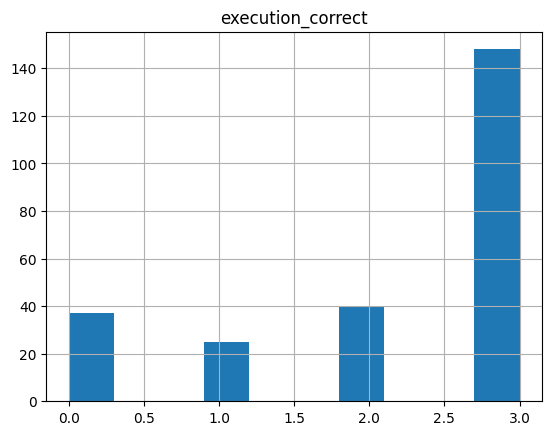

In [23]:
models_df[models_df['dataset'] == 'spider'].groupby('id').agg({'execution_correct' : 'sum'}).hist()

array([[<Axes: title={'center': 'execution_correct'}>]], dtype=object)

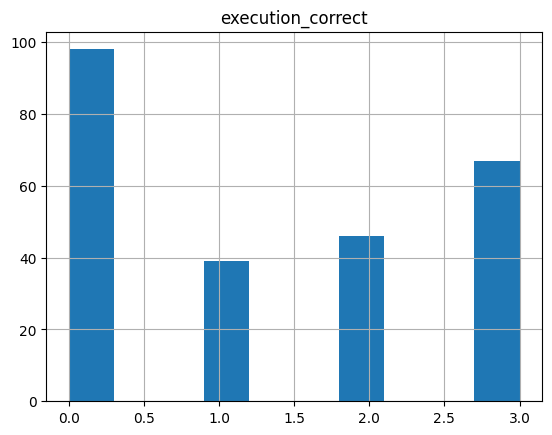

In [24]:
models_df[models_df['dataset'] == 'bird'].groupby('id').agg({'execution_correct' : 'sum'}).hist()

In [6]:
stat_model_df = models_df[models_df['has_prediction'] == True].copy()
stat_model_df['execution_accuracy'] = stat_model_df['execution_correct'].astype(float)
# Print summary statistics
print("\nExecution Accuracy Summary Statistics:")
print("="*50)
summary = stat_model_df.groupby(['model', 'dataset'])['execution_accuracy'].agg(['mean', 'std', 'count']).round(3)

print(summary)


Execution Accuracy Summary Statistics:
                                mean    std  count
model                 dataset                     
Arctic-Text2SQL-R1-7B bird     0.376  0.485    250
                      spider   0.740  0.440    250
Llama-3.3-70B         bird     0.452  0.499    250
                      spider   0.733  0.443    247
Qwen3-Coder-480B      bird     0.500  0.501    250
                      spider   0.735  0.442    249


For binary outcomes (correct/incorrect), the theoretical maximum std is 0.5 (when p=0.5).
Let me check if these match theoretical expectations:

$$ σ = \sqrt{p(1-p)} $$

| Model | Dataset | Mean (p) | Expected σ | Actual σ | Match? |
|-------|---------|----------|------------|----------|--------|
| Qwen | BIRD | 0.500 | 0.500 | 0.501 | ✓ Perfect |
| Llama | SPIDER | 0.735 | 0.441 | 0.442 | ✓ Perfect |
| Arctic | BIRD | 0.376 | 0.485 | 0.485 | ✓ Perfect |

The STD suggest us that models are all performing very closely to each other, and no of them ehxibits partial success as like flipping a fair coin, that here, the instances are 50% of time are being generated correctly and 50% not.

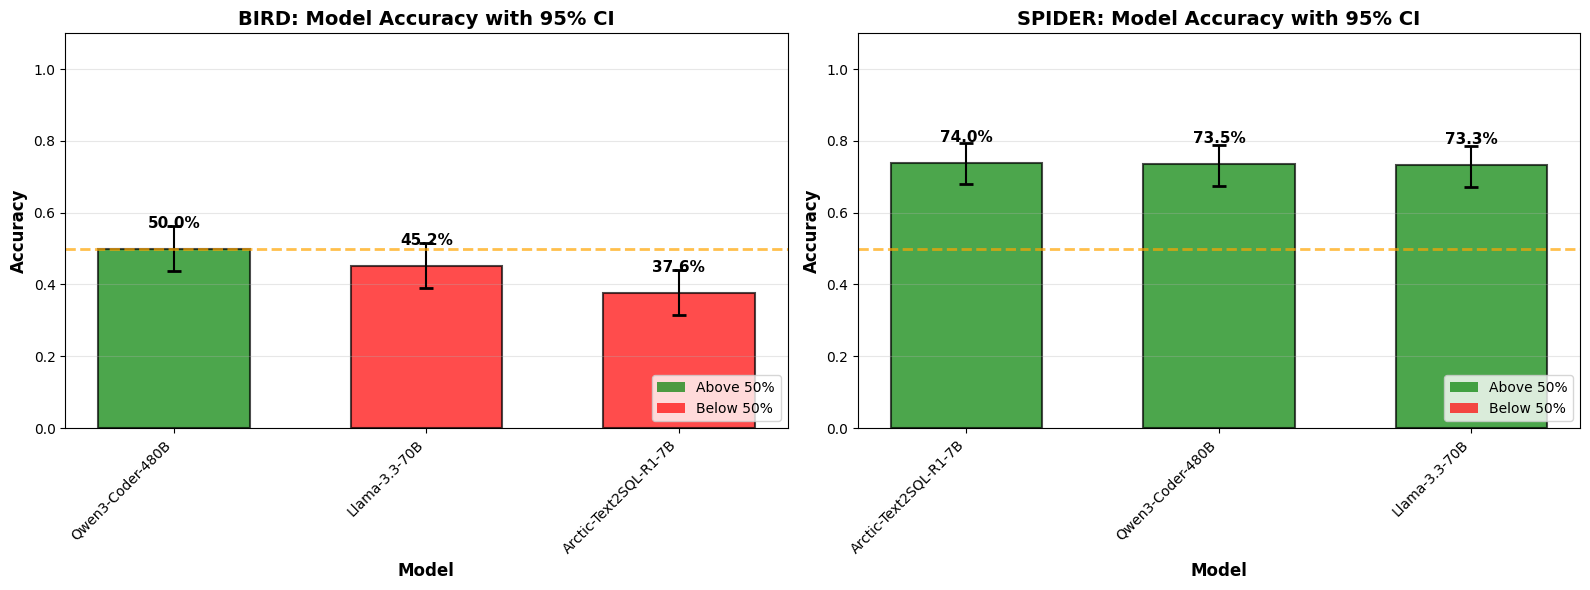

In [12]:
def visualize_model_accuracy_with_ci(combined_df):
    """
    Show model accuracy with confidence intervals - proper for binary data
    """
    from scipy import stats
    
    results = []
    
    for dataset in combined_df['dataset'].unique():
        dataset_df = combined_df[combined_df['dataset'] == dataset]
        
        for model in dataset_df['model'].unique():
            model_df = dataset_df[dataset_df['model'] == model]
            valid = model_df[model_df['has_prediction'] == True]
            
            if len(valid) > 0:
                successes = valid['execution_correct'].sum()
                n = len(valid)
                accuracy = successes / n
                
                # Calculate 95% confidence interval (Wilson score interval for proportions)
                ci_low, ci_high = stats.binomtest(successes, n).proportion_ci(confidence_level=0.95)
                
                results.append({
                    'model': model,
                    'dataset': dataset,
                    'accuracy': accuracy,
                    'ci_low': ci_low,
                    'ci_high': ci_high,
                    'error_low': accuracy - ci_low,
                    'error_high': ci_high - accuracy,
                    'n': n
                })
    
    results_df = pd.DataFrame(results)
    
    # Create visualization
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    for i, dataset in enumerate(['bird', 'spider']):
        data = results_df[results_df['dataset'] == dataset].sort_values('accuracy', ascending=False)
        
        x = np.arange(len(data))
        
        # Plot bars with error bars
        bars = axes[i].bar(x, data['accuracy'], width=0.6, 
                          color=['green' if acc >= 0.5 else 'red' for acc in data['accuracy']],
                          alpha=0.7, edgecolor='black', linewidth=1.5)
        
        # Add error bars (confidence intervals)
        axes[i].errorbar(x, data['accuracy'], 
                        yerr=[data['error_low'], data['error_high']],
                        fmt='none', ecolor='black', capsize=5, capthick=2)
        
        # Add value labels on bars
        for j, (acc, model) in enumerate(zip(data['accuracy'], data['model'])):
            axes[i].text(j, acc + 0.05, f'{acc:.1%}', 
                        ha='center', va='bottom', fontweight='bold', fontsize=11)
        
        axes[i].set_xlabel('Model', fontsize=12, fontweight='bold')
        axes[i].set_ylabel('Accuracy', fontsize=12, fontweight='bold')
        axes[i].set_title(f'{dataset.upper()}: Model Accuracy with 95% CI', 
                         fontsize=14, fontweight='bold')
        axes[i].set_xticks(x)
        axes[i].set_xticklabels(data['model'], rotation=45, ha='right')
        axes[i].set_ylim(0, 1.1)
        axes[i].axhline(y=0.5, color='orange', linestyle='--', linewidth=2, alpha=0.7)
        axes[i].grid(True, alpha=0.3, axis='y')
        
        # Add legend
        from matplotlib.patches import Patch
        legend_elements = [
            Patch(facecolor='green', alpha=0.7, label='Above 50%'),
            Patch(facecolor='red', alpha=0.7, label='Below 50%')
        ]
        axes[i].legend(handles=legend_elements, loc='lower right')
    
    plt.tight_layout()
    plt.show()
    
    return results_df

acc_ci_df = visualize_model_accuracy_with_ci(models_df)

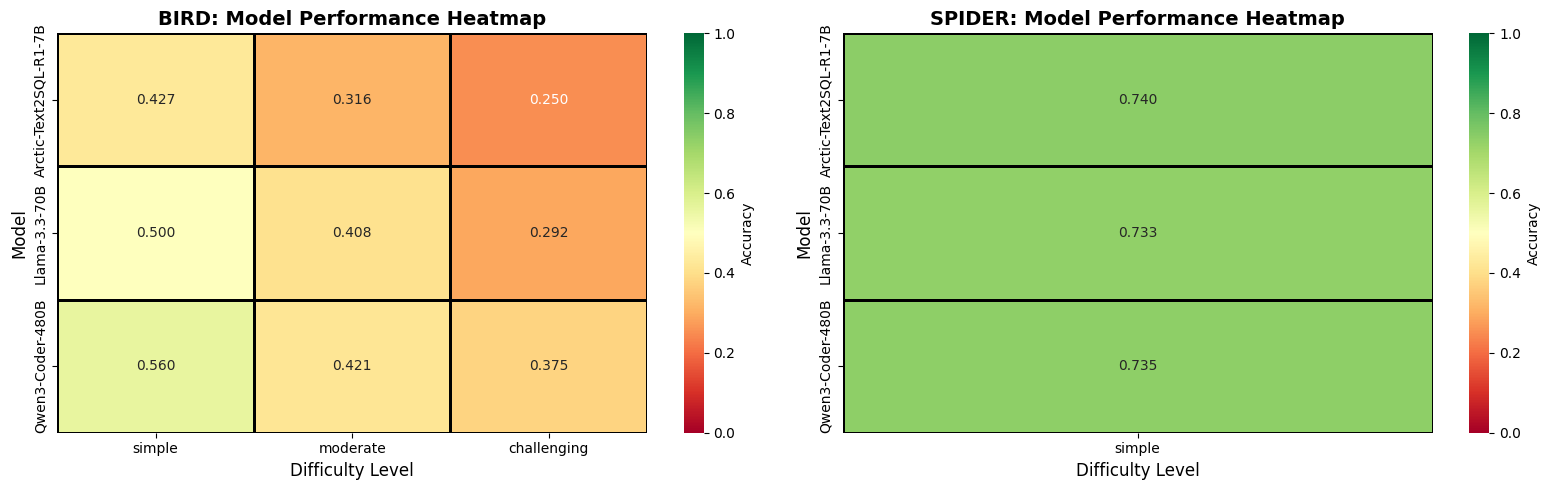

In [44]:
def visualize_model_difficulty_heatmap(combined_df):
    """
    Heatmap showing model performance across difficulty levels
    """
    results = []
    
    for dataset in combined_df['dataset'].unique():
        dataset_df = combined_df[combined_df['dataset'] == dataset]
        
        for model in dataset_df['model'].unique():
            model_df = dataset_df[dataset_df['model'] == model]
            
            for difficulty in model_df['difficulty'].unique():
                diff_df = model_df[model_df['difficulty'] == difficulty]
                valid = diff_df[diff_df['has_prediction'] == True]
                
                if len(valid) > 0:
                    accuracy = valid['execution_correct'].mean()
                    results.append({
                        'model': model,
                        'dataset': dataset,
                        'difficulty': difficulty,
                        'accuracy': accuracy
                    })
    
    results_df = pd.DataFrame(results)
    
    # Create heatmaps
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    
    for i, dataset in enumerate(['bird', 'spider']):
        data = results_df[results_df['dataset'] == dataset]
        
        # Pivot for heatmap
        pivot = data.pivot(index='model', columns='difficulty', values='accuracy')
        
        # Reorder columns by difficulty
        if 'simple' in pivot.columns:
            col_order = [c for c in ['simple', 'moderate', 'challenging'] if c in pivot.columns]
            pivot = pivot[col_order]
        
        # Create heatmap
        sns.heatmap(pivot, annot=True, fmt='.3f', cmap='RdYlGn', 
                   ax=axes[i], vmin=0, vmax=1,
                   cbar_kws={'label': 'Accuracy'},
                   linewidths=1, linecolor='black')
        
        axes[i].set_title(f'{dataset.upper()}: Model Performance Heatmap', 
                         fontsize=14, fontweight='bold')
        axes[i].set_xlabel('Difficulty Level', fontsize=12)
        axes[i].set_ylabel('Model', fontsize=12)
    
    plt.tight_layout()
    plt.show()

visualize_model_difficulty_heatmap(models_df)


Model Similarity Analysis (Agreement on Execution Results):
             Model1                 Model2  Agreement_Rate  Total_Comparisons  \
0     Llama-3.3-70B       Qwen3-Coder-480B           0.821                496   
1     Llama-3.3-70B  Arctic-Text2SQL-R1-7B           0.801                497   
2  Qwen3-Coder-480B  Arctic-Text2SQL-R1-7B           0.788                499   

   Agreements  
0         407  
1         398  
2         393  


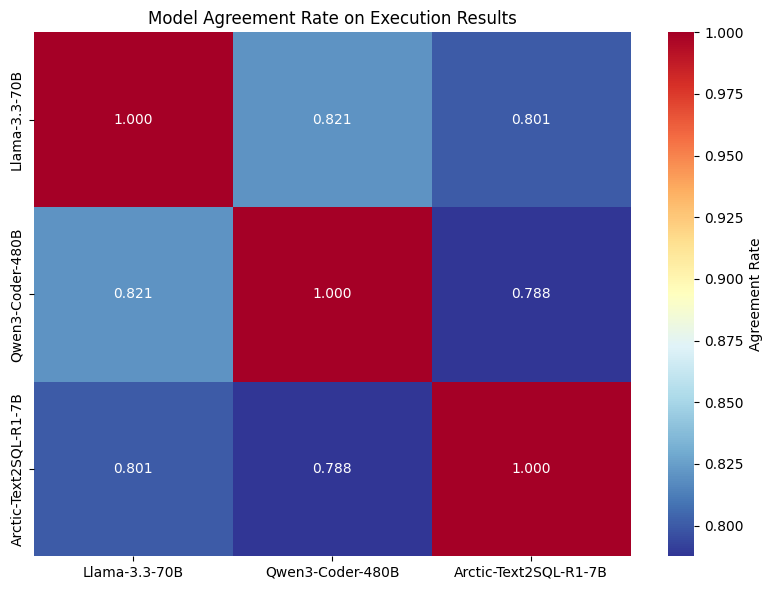

In [19]:
def analyze_model_similarity(combined_df, models):
    """
    Analyze how similar/different models perform on the same instances
    """
    similarity_data = []
    
    # For each pair of models, calculate agreement rate
    for i, model1 in enumerate(models):
        for j, model2 in enumerate(models):
            if i < j:  # Avoid duplicate pairs
                agreements = 0
                total_comparisons = 0
                
                # Find instances both models attempted
                model1_results = combined_df[combined_df['model'] == model1]
                model2_results = combined_df[combined_df['model'] == model2]
                
                for dataset in combined_df['dataset'].unique():
                    m1_dataset = model1_results[model1_results['dataset'] == dataset]
                    m2_dataset = model2_results[model2_results['dataset'] == dataset]
                    
                    # Find common instances
                    common_instances = set(m1_dataset['id'].unique()) & set(m2_dataset['id'].unique())
                    
                    for instance_id in common_instances:
                        m1_result = m1_dataset[m1_dataset['id'] == instance_id]['execution_correct'].iloc[0]
                        m2_result = m2_dataset[m2_dataset['id'] == instance_id]['execution_correct'].iloc[0]
                        
                        if pd.notna(m1_result) and pd.notna(m2_result):
                            if m1_result == m2_result:
                                agreements += 1
                            total_comparisons += 1
                
                if total_comparisons > 0:
                    agreement_rate = agreements / total_comparisons
                    similarity_data.append({
                        'Model1': model1,
                        'Model2': model2,
                        'Agreement_Rate': agreement_rate,
                        'Total_Comparisons': total_comparisons,
                        'Agreements': agreements
                    })
    
    similarity_df = pd.DataFrame(similarity_data)
    
    print("\nModel Similarity Analysis (Agreement on Execution Results):")
    print("="*60)
    print(similarity_df.round(3))
    
    # Create agreement rate heatmap
    if not similarity_df.empty:
        # Create symmetric matrix for heatmap
        agreement_matrix = np.eye(len(models))
        model_to_idx = {model: i for i, model in enumerate(models)}
        
        for _, row in similarity_df.iterrows():
            i = model_to_idx[row['Model1']]
            j = model_to_idx[row['Model2']]
            agreement_matrix[i, j] = row['Agreement_Rate']
            agreement_matrix[j, i] = row['Agreement_Rate']
        
        plt.figure(figsize=(8, 6))
        sns.heatmap(agreement_matrix, 
                   xticklabels=models, 
                   yticklabels=models,
                   annot=True, 
                   fmt='.3f', 
                   cmap='RdYlBu_r',
                   cbar_kws={'label': 'Agreement Rate'})
        plt.title('Model Agreement Rate on Execution Results')
        plt.tight_layout()
        plt.show()
    
    return similarity_df

similarity_df = analyze_model_similarity(models_df, models)

# similarity_df

In [47]:
def analyze_model_similarity_by_dataset(combined_df, models):
    """
    Analyze model agreement separately for each dataset
    """
    results_by_dataset = {}
    
    for dataset in combined_df['dataset'].unique():
        dataset_df = combined_df[combined_df['dataset'] == dataset]
        similarity_data = []
        
        for i, model1 in enumerate(models):
            for j, model2 in enumerate(models):
                if i < j:
                    m1_results = dataset_df[dataset_df['model'] == model1].set_index('id')
                    m2_results = dataset_df[dataset_df['model'] == model2].set_index('id')
                    
                    common_ids = m1_results.index.intersection(m2_results.index)
                    
                    if len(common_ids) > 0:
                        m1_exec = m1_results.loc[common_ids, 'execution_correct']
                        m2_exec = m2_results.loc[common_ids, 'execution_correct']
                        
                        valid_mask = m1_exec.notna() & m2_exec.notna()
                        
                        if valid_mask.sum() > 0:
                            agreements = (m1_exec[valid_mask] == m2_exec[valid_mask]).sum()
                            total = valid_mask.sum()
                            
                            similarity_data.append({
                                'Model1': model1,
                                'Model2': model2,
                                'Agreement_Rate': agreements / total,
                                'Agreements': agreements,
                                'Total': total
                            })
        
        if similarity_data:
            results_by_dataset[dataset] = pd.DataFrame(similarity_data)
            print(f"\n{dataset.upper()} Dataset Agreement:")
            print("="*60)
            print(results_by_dataset[dataset].round(3))
    
    return results_by_dataset

# Use it like this:
# similarity_overall = analyze_model_similarity(models_df, models)
similarity_by_dataset = analyze_model_similarity_by_dataset(models_df, models)


BIRD Dataset Agreement:
             Model1                 Model2  Agreement_Rate  Agreements  Total
0     Llama-3.3-70B       Qwen3-Coder-480B           0.800         200    250
1     Llama-3.3-70B  Arctic-Text2SQL-R1-7B           0.764         191    250
2  Qwen3-Coder-480B  Arctic-Text2SQL-R1-7B           0.756         189    250

SPIDER Dataset Agreement:
             Model1                 Model2  Agreement_Rate  Agreements  Total
0     Llama-3.3-70B       Qwen3-Coder-480B           0.841         207    246
1     Llama-3.3-70B  Arctic-Text2SQL-R1-7B           0.838         207    247
2  Qwen3-Coder-480B  Arctic-Text2SQL-R1-7B           0.819         204    249


In [50]:
def agreement_quality_analysis(combined_df, models, dataset):
    """
    The CRITICAL analysis: What drives agreement?
    """
    dataset_df = combined_df[combined_df['dataset'] == dataset]
    
    print(f"\n{'='*70}")
    print(f"AGREEMENT QUALITY ANALYSIS: {dataset.upper()}")
    print('='*70)
    
    # First: Individual model performance
    print("\nIndividual Model Performance:")
    print("-" * 70)
    for model in models:
        model_df = dataset_df[dataset_df['model'] == model]
        valid = model_df['execution_correct'].notna()
        if valid.sum() > 0:
            accuracy = model_df.loc[valid, 'execution_correct'].mean()
            print(f"{model:30s}: {accuracy:.1%} accuracy ({valid.sum()} instances)")
    
    # Now: Agreement breakdown
    print("\n\nAgreement Breakdown (What kind of agreement?):")
    print("-" * 70)
    
    for i, model1 in enumerate(models):
        for j, model2 in enumerate(models):
            if i < j:
                m1_df = dataset_df[dataset_df['model'] == model1].set_index('id')
                m2_df = dataset_df[dataset_df['model'] == model2].set_index('id')
                
                common_ids = m1_df.index.intersection(m2_df.index)
                m1_exec = m1_df.loc[common_ids, 'execution_correct']
                m2_exec = m2_df.loc[common_ids, 'execution_correct']
                
                valid_mask = m1_exec.notna() & m2_exec.notna()
                m1_valid = m1_exec[valid_mask]
                m2_valid = m2_exec[valid_mask]
                
                both_correct = ((m1_valid == True) & (m2_valid == True)).sum()
                both_wrong = ((m1_valid == False) & (m2_valid == False)).sum()
                total = len(m1_valid)
                
                agreement_rate = (both_correct + both_wrong) / total
                
                print(f"\n{model1} vs {model2}:")
                print(f"  Total comparisons:     {total}")
                print(f"  Both CORRECT:          {both_correct:3d} ({both_correct/total:6.1%}) ← Success agreement")
                print(f"  Both WRONG:            {both_wrong:3d} ({both_wrong/total:6.1%}) ← Failure agreement")
                print(f"  Disagreement:          {total - both_correct - both_wrong:3d} ({(total - both_correct - both_wrong)/total:6.1%})")
                print(f"  Total Agreement:       {agreement_rate:.1%}")
                print(f"  → Agreement type: {both_correct/(both_correct + both_wrong):.1%} success, "
                      f"{both_wrong/(both_correct + both_wrong):.1%} failure")

# Run this!
for dataset in datasets:
    agreement_quality_analysis(models_df, models, dataset)


AGREEMENT QUALITY ANALYSIS: BIRD

Individual Model Performance:
----------------------------------------------------------------------
Llama-3.3-70B                 : 45.2% accuracy (250 instances)
Qwen3-Coder-480B              : 50.0% accuracy (250 instances)
Arctic-Text2SQL-R1-7B         : 37.6% accuracy (250 instances)


Agreement Breakdown (What kind of agreement?):
----------------------------------------------------------------------

Llama-3.3-70B vs Qwen3-Coder-480B:
  Total comparisons:     250
  Both CORRECT:           94 ( 37.6%) ← Success agreement
  Both WRONG:            106 ( 42.4%) ← Failure agreement
  Disagreement:           50 ( 20.0%)
  Total Agreement:       80.0%
  → Agreement type: 47.0% success, 53.0% failure

Llama-3.3-70B vs Arctic-Text2SQL-R1-7B:
  Total comparisons:     250
  Both CORRECT:           74 ( 29.6%) ← Success agreement
  Both WRONG:            117 ( 46.8%) ← Failure agreement
  Disagreement:           59 ( 23.6%)
  Total Agreement:       76.4%
 

In [57]:
def analyze_disagreements(combined_df, model1, model2, dataset):
    """
    Focus on where models DIFFER - this is the interesting part!
    """
    dataset_df = combined_df[combined_df['dataset'] == dataset]
    
    m1_df = dataset_df[dataset_df['model'] == model1].set_index('id')
    m2_df = dataset_df[dataset_df['model'] == model2].set_index('id')
    
    common_ids = m1_df.index.intersection(m2_df.index)
    
    # Find disagreements
    m1_exec = m1_df.loc[common_ids, 'execution_correct']
    m2_exec = m2_df.loc[common_ids, 'execution_correct']
    
    disagreement_mask = (m1_exec != m2_exec) & m1_exec.notna() & m2_exec.notna()
    disagreement_ids = common_ids[disagreement_mask]
    
    print(f"\nDisagreement Analysis: {model1} vs {model2} on {dataset}")
    print(f"Found {len(disagreement_ids)} disagreements ({len(disagreement_ids)/len(common_ids):.1%})")
    
    if len(disagreement_ids) > 0:
        # Analyze disagreement patterns
        disagreement_data = []
        for inst_id in disagreement_ids:
            m1_row = m1_df.loc[inst_id]
            m2_row = m2_df.loc[inst_id]
            
            disagreement_data.append({
                'id': inst_id,
                'difficulty': m1_row.get('difficulty', 'unknown'),
                f'{model1}_correct': m1_row['execution_correct'],
                f'{model2}_correct': m2_row['execution_correct'],
                'question': m1_row.get('question', '')[:100] + '...'
            })
        
        disagree_df = pd.DataFrame(disagreement_data)
        
        # Difficulty distribution of disagreements
        if 'difficulty' in disagree_df.columns:
            print("\nDisagreement by difficulty:")
            print(disagree_df['difficulty'].value_counts())
        
        return disagree_df

# Analyze the interesting cases!
# for dataset in datasets:
    # disagree_df = analyze_disagreements(models_df, 'Llama-3.3-70B', 
    #                                    'Qwen3-Coder-480B', dataset)
    
for dataset in datasets:
    disagree_df = analyze_disagreements(models_df, 'Qwen3-Coder-480B', 
                                       'Arctic-Text2SQL-R1-7B', dataset)
    
# for dataset in datasets: 
    # disagree_df = analyze_disagreements(models_df, 'Llama-3.3-70B', 
    #                                    'Arctic-Text2SQL-R1-7B', dataset)


Disagreement Analysis: Qwen3-Coder-480B vs Arctic-Text2SQL-R1-7B on bird
Found 61 disagreements (24.4%)

Disagreement by difficulty:
difficulty
simple         36
moderate       20
challenging     5
Name: count, dtype: int64

Disagreement Analysis: Qwen3-Coder-480B vs Arctic-Text2SQL-R1-7B on spider
Found 45 disagreements (18.1%)

Disagreement by difficulty:
difficulty
simple    45
Name: count, dtype: int64


## Findings #1
> Our analysis reveals that only 20% of BIRD instances and 18% of SPIDER instances effectively discriminate between state-of-the-art models. The remaining instances exhibit binary behavior where all models either succeed or fail together, suggesting these benchmarks have reached saturation for modern LLMs.

In [59]:
def analyze_discriminative_instances(combined_df, models, dataset):
    """
    Focus on the 20% that actually differentiate models
    """
    dataset_df = combined_df[combined_df['dataset'] == dataset]
    
    # Find instances where models disagree
    disagreement_instances = []
    
    for instance_id in dataset_df['id'].unique():
        instance_results = dataset_df[dataset_df['id'] == instance_id]
        
        if len(instance_results) >= 2:  # At least 2 models evaluated it
            exec_results = instance_results['execution_correct'].dropna()
            
            if len(exec_results) >= 2:
                # Check if there's disagreement
                if not exec_results.nunique() == 1:
                    disagreement_instances.append(instance_id)
    
    # Analyze these discriminative instances
    discriminative_df = dataset_df[dataset_df['id'].isin(disagreement_instances)]
    
    print(f"\n{'='*70}")
    print(f"DISCRIMINATIVE INSTANCES ANALYSIS: {dataset.upper()}")
    print('='*70)
    print(f"\nTotal instances: {dataset_df['id'].nunique()}")
    print(f"Discriminative instances: {len(disagreement_instances)} ({len(disagreement_instances)/dataset_df['id'].nunique():.1%})")
    
    # What makes them special?
    if 'difficulty' in discriminative_df.columns:
        print("\nDifficulty distribution of discriminative instances:")
        print(discriminative_df.groupby('id')['difficulty'].first().value_counts())
   
    
    return discriminative_df

# Run this
for dataset in datasets:
    disc_df = analyze_discriminative_instances(models_df, models, dataset)


DISCRIMINATIVE INSTANCES ANALYSIS: BIRD

Total instances: 250
Discriminative instances: 85 (34.0%)

Difficulty distribution of discriminative instances:
difficulty
simple         54
moderate       25
challenging     6
Name: count, dtype: int64

DISCRIMINATIVE INSTANCES ANALYSIS: SPIDER

Total instances: 250
Discriminative instances: 63 (25.2%)

Difficulty distribution of discriminative instances:
difficulty
simple    63
Name: count, dtype: int64


# Finding #2: Model Convergence

> "High agreement rates (75-84%) between models of vastly different scales (7B to 480B parameters) indicate convergence in Text2SQL capabilities. This suggests that current training paradigms and datasets lead models to learn similar solution strategies, with differentiation occurring only on a small subset of ambiguous or highly complex instances."

# Finding #3: The Gap Instances Are Key
The 20% disagreement cases are the most interesting! They represent:

1. Edge cases current models struggle with
2. Instances where model differences actually matter
3. Potential focus areas for multi-agent approaches

# Models Failure Analysis

In [42]:
def find_universal_failures(combined_df, models):
    """
    Find instances where ALL models failed execution accuracy
    """
    failures = []
    
    # Group by instance ID and dataset
    for dataset in combined_df['dataset'].unique():
        dataset_df = combined_df[combined_df['dataset'] == dataset]
        
        for instance_id in dataset_df['id'].unique():
            instance_results = dataset_df[dataset_df['id'] == instance_id]
            
            # Check if we have results from all models
            models_tested = set(instance_results['model'].unique())
            
            if len(models_tested) == len(models):  # All models attempted this instance
                # Check if ALL models failed (execution_correct = False)
                execution_results = instance_results['execution_correct'].tolist()
                
                if all(result == False for result in execution_results if pd.notna(result)):
                    # This instance failed for all models
                    sample_row = instance_results.iloc[0]
                    
                    failure_info = {
                        'instance_id': instance_id,
                        'dataset': dataset,
                        'question': sample_row['question'],
                        'gold_sql' : sample_row['sql'],
                        'schema' : sample_row.get('schemas', 'N/A'),
                        'difficulty': sample_row['difficulty'],
                        'question_length': len(sample_row['question']),
                        'sql_length': sample_row.get('sql_char_length', 0),
                        'num_tables': sample_row.get('sql_tables_count', 0),
                        'num_joins': sample_row.get('sql_join_count', 0),
                    }
                    
                    # Add error messages from each model
                    for _, model_result in instance_results.iterrows():
                        model_name = model_result['model']
                        failure_info[f'{model_name}_error'] = model_result.get('execution_error', 'No error message')
                        failure_info[f'{model_name}_generated_sql'] = model_result.get('generated_sql', 'No SQL generated')
                        if model_result.get('semantic_equivalent', False) == False:
                            failure_info[f'{model_name}_semantic_explanation'] = model_result.get('semantic_explanation', 'No explanation')
                    
                    failures.append(failure_info)
    
    failures_df = pd.DataFrame(failures)
    
    print(f"\nFound {len(failures_df)} instances where ALL {len(models)} models failed, out of {len(combined_df)} total instances.")
    print("="*60)
    
    if not failures_df.empty:
        print("\nCharacteristics of Universal Failures:")
        print(f"Average question length: {failures_df['question_length'].mean():.1f} characters")
        print(f"Average SQL length: {failures_df['sql_length'].mean():.1f} characters")
        print(f"Average number of tables: {failures_df['num_tables'].mean():.1f}")
        
        print("\nDifficulty distribution:")
        print(failures_df['difficulty'].value_counts())
        
        print("\nDataset distribution:")
        print(failures_df['dataset'].value_counts())
        
        print("\nTop 5 Most Complex Universal Failures (by SQL length):")
        print("-"*50)
        top_complex = failures_df.nlargest(5, 'sql_length')
        for idx, row in top_complex.iterrows():
            print(f"Instance {row['instance_id']} ({row['dataset']}):")
            print(f"  Difficulty: {row['difficulty']}")
            print(f"  SQL Length: {row['sql_length']} chars")
            print(f"  Question: {row['question']}")
            print(f"  Gold SQL: {row['gold_sql']}")
            print("  ***Generated SQLs and Errors:***")
            for model in models:
                print(f" ---- [  {model}:")
                print(f"      Generated SQL: {row.get(f'{model}_generated_sql', 'N/A')}")
                print(f"      Error: {row.get(f'{model}_error', 'N/A')} ] ----")
            
            print('\n',100*"-",'\n')
    
    return failures_df

In [43]:
uni_failed_df = find_universal_failures(models_df, models)
# uni_failed_df.head()


Found 135 instances where ALL 3 models failed, out of 1496 total instances.

Characteristics of Universal Failures:
Average question length: 89.5 characters
Average SQL length: 180.2 characters
Average number of tables: 2.1

Difficulty distribution:
difficulty
simple         86
moderate       35
challenging    14
Name: count, dtype: int64

Dataset distribution:
dataset
bird      98
spider    37
Name: count, dtype: int64

Top 5 Most Complex Universal Failures (by SQL length):
--------------------------------------------------
Instance 1014 (bird):
  Difficulty: challenging
  SQL Length: 1231 chars
  Question: Please list the lap records for the circuits in Italy.
  Gold SQL: WITH fastest_lap_times AS (SELECT T1.raceId, T1.FastestLapTime, (CAST(SUBSTR(T1.FastestLapTime, 1, INSTR(T1.FastestLapTime, ':') - 1) AS REAL) * 60) + (CAST(SUBSTR(T1.FastestLapTime, INSTR(T1.FastestLapTime, ':') + 1, INSTR(T1.FastestLapTime, '.') - INSTR(T1.FastestLapTime, ':') - 1) AS REAL)) + (CAST(SUBSTR(T1.Fas

In [28]:
# check the models error types 
# in the column name if has _error 
models_errors = uni_failed_df[uni_failed_df.filter(like='_error').columns.tolist()]
# ok now categorize the error types
# Execution error (if for each model there it has written 'Execution error:' )
error_types = {}
for model in models_errors:
    error_list = models_errors[model].tolist()
    exec_errors = [err for err in error_list if 'Execution error:' in err]
    no_error_msgs = [err for err in error_list if err == '']
    ground_truth_exe_error = [err for err in error_list if 'Ground truth execution error' in err]

    error_types[model] = {
        'Total Errors': len(error_list),
        'Execution Errors': exec_errors,
        'No Error Message**': len(no_error_msgs),
        'Ground Truth Execution Errors': ground_truth_exe_error,
    }

# Print error type summary
print("\nModel Error Type Summary:")
print("="*40)
for model, types in error_types.items():
    print(f"{model}:")
    for etype, count in types.items():
        if isinstance(count, list):
            count = len(count)
        print(f"  {etype}: {count}")
    print()

print("** 'No Error Message**' : indicates instances where there is no error simply because the model did not generate the correct SQL \n\t\t but it was executable and correct with respect to its schema.")



Model Error Type Summary:
Llama-3.3-70B_error:
  Total Errors: 135
  Execution Errors: 23
  No Error Message**: 111
  Ground Truth Execution Errors: 1

Qwen3-Coder-480B_error:
  Total Errors: 135
  Execution Errors: 19
  No Error Message**: 115
  Ground Truth Execution Errors: 1

Arctic-Text2SQL-R1-7B_error:
  Total Errors: 135
  Execution Errors: 20
  No Error Message**: 102
  Ground Truth Execution Errors: 13

** 'No Error Message**' : indicates instances where there is no error simply because the model did not generate the correct SQL 
		 but it was executable and correct with respect to its schema.


In [41]:
error_types_df = pd.DataFrame(error_types).T

for exe_err in error_types_df['Execution Errors'].items():
    print(f"\nModel: {exe_err[0]}")
    for err in exe_err[1]:
        print(f" - {err}")
        


Model: Llama-3.3-70B_error
 - Execution error: '<' not supported between instances of 'str' and 'float'
 - Execution error: '<' not supported between instances of 'float' and 'str'
 - Execution error: unrecognized token: "\"
 - Execution error: no such column: T2.publisher_name
 - Execution error: near "s": syntax error
 - Execution error: no such column: Segment
 - Execution error: '<' not supported between instances of 'NoneType' and 'str'
 - Execution error: '<' not supported between instances of 'int' and 'str'
 - Execution error: '<' not supported between instances of 'NoneType' and 'str'
 - Execution error: You can only execute one statement at a time.
 - Execution error: no such column: YEAR
 - Execution error: '<' not supported between instances of 'int' and 'str'
 - Execution error: '<' not supported between instances of 'int' and 'str'
 - Execution error: '<' not supported between instances of 'str' and 'int'
 - Execution error: unrecognized token: "\"
 - Execution error: no

## Key Insights

### 🔴 **Critical Issue: Type Mismatches (65-68% of all errors)**

All three models struggle significantly with **data type handling**. The pattern shows:

- **String vs Numeric comparisons** dominate the errors
- Models fail to properly cast or quote values when comparing columns
- Example: comparing `'2020'` (string) with `2020` (integer) in WHERE clauses

**Root Cause Analysis:**
```sql
-- ❌ Generated (causes error)
WHERE year < '2020'  -- if year is INT

-- ✅ Should be
WHERE year < 2020    -- or CAST('2020' AS INTEGER)
```

# individual Instances Analysis 

In [25]:
uni_failed_df.head()

,instance_id,dataset,question,gold_sql,schema,difficulty,question_length,sql_length,num_tables,num_joins,Llama-3.3-70B_error,Llama-3.3-70B_generated_sql,Qwen3-Coder-480B_error,Qwen3-Coder-480B_generated_sql,Qwen3-Coder-480B_semantic_explanation,Arctic-Text2SQL-R1-7B_error,Arctic-Text2SQL-R1-7B_generated_sql,Llama-3.3-70B_semantic_explanation,Arctic-Text2SQL-R1-7B_semantic_explanation
0,1503,bird,Please list the product description of the pro...,"SELECT DISTINCT T1.ProductID, T3.Description F...","[{'table_name': 'customers', 'description': 'T...",simple,83,214,3,2,,SELECT T2.Description FROM transactions_1k AS ...,Execution error: no such column: t.Currency,SELECT DISTINCT p.Description FROM transaction...,Execution failed: Execution error: no such col...,,SELECT DISTINCT p.Description FROM products AS...,NaN,NaN
1,523,bird,What is the annual average number of sets that...,SELECT (CAST(SUM(T1.id) AS REAL) / COUNT(T1.id...,"[{'table_name': 'cards', 'description': 'The d...",challenging,135,256,2,1,Execution error: '<' not supported between ins...,"SELECT AVG(T1.baseSetSize) AS average_sets, (S...",Execution error: '<' not supported between ins...,"SELECT AVG(s.id) as annual_average_sets, (SELE...",Execution failed: Execution error: '<' not sup...,Ground truth execution error: unable to open d...,WITH FilteredCards AS (\n SELECT *\n FRO...,Execution failed: Execution error: '<' not sup...,Execution failed: Ground truth execution error...
2,1024,bird,Who are the top 5 players who perform better i...,SELECT id FROM Player_Attributes ORDER BY cros...,"[{'table_name': 'Player_Attributes', 'descript...",simple,91,63,1,0,,SELECT player_api_id FROM Player_Attributes OR...,,SELECT player_api_id FROM Player_Attributes OR...,The queries are not semantically equivalent be...,,"SELECT player_api_id, MAX(crossing) AS max_cro...",The two queries are selecting different column...,The first query incorrectly attempts to find t...
3,893,bird,Name the top 3 drivers and the points they sco...,"SELECT T3.forename, T3.surname, T2.points FROM...","[{'table_name': 'circuits', 'description': 'Th...",simple,81,258,3,2,Execution error: '<' not supported between ins...,"SELECT T1.forename, T1.surname, T2.points FROM...",Execution error: '<' not supported between ins...,"SELECT d.forename, d.surname, r.points FROM re...",Execution failed: Execution error: '<' not sup...,,SELECT \n d.forename || ' ' || d.surname AS d...,Execution failed: Execution error: '<' not sup...,NaN
4,415,bird,What percentage of cards with format commander...,SELECT CAST(SUM(CASE WHEN T1.hasContentWarning...,"[{'table_name': 'cards', 'description': 'The d...",challenging,94,219,2,1,,SELECT CAST(SUM(CASE WHEN T1.hasContentWarning...,,SELECT (COUNT(CASE WHEN c.hasContentWarning = ...,NaN,Ground truth execution error: unable to open d...,SELECT CAST(SUM(CASE WHEN c.hasContentWarning ...,NaN,Execution failed: Ground truth execution error...


In [26]:
uni_failed_df.to_csv('universal_failures.csv', index=False)

In [27]:
sampled_1 = uni_failed_df[uni_failed_df['instance_id'] == 1014] # This one is really HARD !!!!!!!!!

sampled_1

,instance_id,dataset,question,gold_sql,schema,difficulty,question_length,sql_length,num_tables,num_joins,Llama-3.3-70B_error,Llama-3.3-70B_generated_sql,Qwen3-Coder-480B_error,Qwen3-Coder-480B_generated_sql,Qwen3-Coder-480B_semantic_explanation,Arctic-Text2SQL-R1-7B_error,Arctic-Text2SQL-R1-7B_generated_sql,Llama-3.3-70B_semantic_explanation,Arctic-Text2SQL-R1-7B_semantic_explanation
31,1014,bird,Please list the lap records for the circuits i...,"WITH fastest_lap_times AS (SELECT T1.raceId, T...","[{'table_name': 'circuits', 'description': 'Th...",challenging,54,1231,5,5,,"SELECT T1.name, MIN(T2.milliseconds) as lap_re...",,"SELECT c.name AS circuit_name, MIN(lt.time) AS...",The two queries are not semantically equivalen...,"Execution error: near ""json"": syntax error","json\n{""sql"": ""SELECT lt.time AS lap_time\nFRO...",The two queries are not semantically equivalen...,"Execution failed: Execution error: near ""json""..."


In [72]:
# question
# print("The question : ",sampled_1.question.values[0])
# print("The gold SQL : ",sampled_1.gold_sql.values[0])
gold_sql = '''
    WITH fastest_lap_times AS 
    (SELECT T1.raceId, T1.FastestLapTime, (CAST(SUBSTR(T1.FastestLapTime, 1, INSTR(T1.FastestLapTime, ':') - 1) AS REAL) * 60)
    + (CAST(SUBSTR(T1.FastestLapTime, INSTR(T1.FastestLapTime, ':') + 1, INSTR(T1.FastestLapTime, '.') - INSTR(T1.FastestLapTime, ':') - 1) AS REAL))
    + (CAST(SUBSTR(T1.FastestLapTime, INSTR(T1.FastestLapTime, '.') + 1) AS REAL) / 1000) as time_in_seconds FROM results AS T1 WHERE T1.FastestLapTime IS NOT NULL )
        SELECT T1.FastestLapTime as lap_record FROM results AS T1
        INNER JOIN races AS T2 on T1.raceId = T2.raceId 
        INNER JOIN circuits AS T3 on T2.circuitId = T3.circuitId 
        INNER JOIN (SELECT MIN(fastest_lap_times.time_in_seconds) as min_time_in_seconds FROM fastest_lap_times 
        INNER JOIN races AS T2 on fastest_lap_times.raceId = T2.raceId 
        INNER JOIN circuits AS T3 on T2.circuitId = T3.circuitId WHERE T3.country = 'Italy' )
          AS T4 ON (CAST(SUBSTR(T1.FastestLapTime, 1, INSTR(T1.FastestLapTime, ':') - 1)
            AS REAL) * 60) + (CAST(SUBSTR(T1.FastestLapTime, INSTR(T1.FastestLapTime, ':') + 1, INSTR(T1.FastestLapTime, '.') - INSTR(T1.FastestLapTime, ':') - 1) AS REAL)) + (CAST(SUBSTR(T1.FastestLapTime, INSTR(T1.FastestLapTime, '.') + 1) AS REAL) / 1000) = T4.min_time_in_seconds LIMIT 1
    '''

# schema_1 = eval(sampled_1.schema.values[0])
# for table in schema_1:
#     print(f"Table: {table['table_name']}")
#     print(f"Description: {table.get('description', 'No description')}")
#     print("DDL", table.get('DDL', 'No DDL available'))
#     print(50*"-")
#     print("\n")

In [28]:
sampled_1 = uni_failed_df[uni_failed_df['instance_id'] == 1024] # 

sampled_1

,instance_id,dataset,question,gold_sql,schema,difficulty,question_length,sql_length,num_tables,num_joins,Llama-3.3-70B_error,Llama-3.3-70B_generated_sql,Qwen3-Coder-480B_error,Qwen3-Coder-480B_generated_sql,Qwen3-Coder-480B_semantic_explanation,Arctic-Text2SQL-R1-7B_error,Arctic-Text2SQL-R1-7B_generated_sql,Llama-3.3-70B_semantic_explanation,Arctic-Text2SQL-R1-7B_semantic_explanation
2,1024,bird,Who are the top 5 players who perform better i...,SELECT id FROM Player_Attributes ORDER BY cros...,"[{'table_name': 'Player_Attributes', 'descript...",simple,91,63,1,0,,SELECT player_api_id FROM Player_Attributes OR...,,SELECT player_api_id FROM Player_Attributes OR...,The queries are not semantically equivalent be...,,"SELECT player_api_id, MAX(crossing) AS max_cro...",The two queries are selecting different column...,The first query incorrectly attempts to find t...


In [29]:
import re
import json

print("The question : ",sampled_1.question.values[0])

print("The gold SQL : ",sampled_1.gold_sql.values[0])

print(" ===== The Schema  ===== ")

shcema_1 = sampled_1.schema.values[0]
for table in shcema_1:
    print(f"Table: {table['table_name']}")
    print(f"Description: {table.get('description', 'No description')}")
    print("DDL", table.get('DDL', 'No DDL available'))
    print(50*"-")
    print("\n")

The question :  Who are the top 5 players who perform better in crossing actions? Indicate their player id.
The gold SQL :  SELECT id FROM Player_Attributes ORDER BY crossing DESC LIMIT 5
 ===== The Schema  ===== 
Table: Player_Attributes
Description: nan
DDL CREATE TABLE "Player_Attributes" (
	`id`	INTEGER PRIMARY KEY AUTOINCREMENT,
	`player_fifa_api_id`	INTEGER,
	`player_api_id`	INTEGER,
	`date`	TEXT,
	`overall_rating`	INTEGER,
	`potential`	INTEGER,
	`preferred_foot`	TEXT,
	`attacking_work_rate`	TEXT,
	`defensive_work_rate`	TEXT,
	`crossing`	INTEGER,
	`finishing`	INTEGER,
	`heading_accuracy`	INTEGER,
	`short_passing`	INTEGER,
	`volleys`	INTEGER,
	`dribbling`	INTEGER,
	`curve`	INTEGER,
	`free_kick_accuracy`	INTEGER,
	`long_passing`	INTEGER,
	`ball_control`	INTEGER,
	`acceleration`	INTEGER,
	`sprint_speed`	INTEGER,
	`agility`	INTEGER,
	`reactions`	INTEGER,
	`balance`	INTEGER,
	`shot_power`	INTEGER,
	`jumping`	INTEGER,
	`stamina`	INTEGER,
	`strength`	INTEGER,
	`long_shots`	INTEGER,
	`ag

In [88]:
models_output_1 = sampled_1[sampled_1.columns[sampled_1.columns.str.contains('_generated_sql')]].to_dict()

models_error_1 = sampled_1[sampled_1.columns[sampled_1.columns.str.contains('_error')]].to_dict()

models_explanation_1 = sampled_1[sampled_1.columns[sampled_1.columns.str.contains('_semantic_explanation')]].to_dict()

for model in models:
    print(f" ---- [  {model}:")
    print(f"      Generated SQL: {models_output_1.get(f'{model}_generated_sql', 'N/A')}")
    print(f"      Error: {models_error_1.get(f'{model}_error', 'N/A')} ] ----")
    print(f"      Explanation: {models_explanation_1.get(f'{model}_semantic_explanation', 'N/A')} ] ----")

 ---- [  Llama-3.3-70B:
      Generated SQL: {2: 'SELECT player_api_id FROM Player_Attributes ORDER BY crossing DESC LIMIT 5'}
      Error: {2: ''} ] ----
      Explanation: {2: "The two queries are selecting different columns ('id' vs 'player_api_id'), which likely refer to different identifiers for the players, making them non-equivalent."} ] ----
 ---- [  Qwen3-Coder-480B:
      Generated SQL: {2: 'SELECT player_api_id FROM Player_Attributes ORDER BY crossing DESC LIMIT 5'}
      Error: {2: ''} ] ----
      Explanation: {2: "The queries are not semantically equivalent because they select different columns: the Gold SQL Query selects 'id' while the Generated SQL Query selects 'player_api_id'. Although both queries order by crossing in descending order and limit to 5 results, they would return different column values, making the results fundamentally different."} ] ----
 ---- [  Arctic-Text2SQL-R1-7B:
      Generated SQL: {2: 'SELECT player_api_id, MAX(crossing) AS max_crossing FROM P

# Claude Response 
claude_sql :
```
SELECT player_api_id, MAX(crossing) as max_crossing FROM Player_Attributes WHERE crossing IS NOT NULL GROUP BY player_api_id ORDER BY max_crossing DESC LIMIT 5
```

> And the Claude explanation by giving the gold sql to explain why it made wrong answer:

Looking at my answer versus the gold SQL, I made several key mistakes:

## My Mistakes:

1. **Over-engineering the problem**: I assumed I needed to group by `player_api_id` and take the MAX crossing value for each player, but the question simply asks for the top 5 crossing performance records, not necessarily 5 unique players.

2. **Wrong column selection**: I selected `player_api_id`, but the question asks for "player id" and the gold answer selects `id` (which is the primary key of the `Player_Attributes` table). I misinterpreted which "id" was being requested.

3. **Unnecessary complexity**: I added:
   - `WHERE crossing IS NOT NULL` (not needed if we're just ordering)
   - `GROUP BY player_api_id` 
   - `MAX(crossing)` aggregation
   
   When the simple approach of just ordering by `crossing DESC` was sufficient.

4. **Misunderstanding the requirements**: I interpreted "top 5 players who perform better in crossing" as "5 unique players with best crossing stats", but the gold answer suggests it wants the "top 5 crossing performance records" regardless of whether they belong to the same or different players.

## Key Lesson:
Sometimes the simplest interpretation is correct. I should have started with the most straightforward query and only added complexity if the requirements explicitly demanded it. The question was asking for the top 5 records based on crossing performance, not the top 5 unique players.'''